In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
from typing import List, Dict
from misc.debug_versions.wrappers import HeapWrapper, HeapqWrapped, HeapQueueWrapped

In [3]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

 loop_count_compare
 

In [2]:
data: Dict[int, Dict[str, Dict[str, Dict[str, int]]]] = {}
#  {
#   power: {
#           heap_type: {
#                       before: { down: int, up: int, swaps: int}
#                       after: { down: int, up: int, swaps: int}
#                      }
#          }
#   }

print("Running")
outer_t = time.time()
for power in range(2, 21, 2):
    data[power] = {}
    node_count = 2 ** power - 2
    nodes = [(1, 1) for x in range(node_count)]
    heaps: List[HeapWrapper] = [
        HeapQueueWrapped(name="HeapQueue duplicates", duplicates=True, data=nodes[:]),
        HeapqWrapped(name="Heapq", data=nodes[:])
    ]
    for heap_i, heap in enumerate(heaps):
        data[power][heap.name] = {}
        data[power][heap.name]["before"] = {
            "down": heap.heapify_down_loops(),
            "up": heap.heapify_up_loops(),
            "swaps": heap.swaps()
        }
        heap.reset_heapify_down_loops()  # resets number of loops before pop
        heap.reset_heapify_up_loops()
        heap.reset_swaps()
        heap.pop()
        data[power][heap.name]["after"] = {
            "down": heap.heapify_down_loops(),
            "up": heap.heapify_up_loops(),
            "swaps": heap.swaps()
        }
print("Done running", time.time() - outer_t)


Running
Done running 2.7400662899017334


In [3]:
power_text = ['$2^{' + str(x) + "}$" for x in sorted(data.keys())]

data_formatted = {}
for name in ["Heapq", "HeapQueue duplicates"]:
    data_formatted[name] = {}
    for time in ["before", "after"]:
        data_formatted[name][time] = {}
        for variable in ["down", "up", "swaps"]:
            data_formatted[name][time][variable] = [data[power][name][time][variable] for power in sorted(data.keys())]


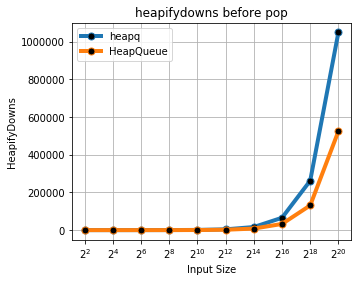

In [4]:
plt.subplots(figsize=(5,4))
plt.title('heapifydowns before pop')
plt.xlabel('Input Size')
plt.ylabel('HeapifyDowns')
plt.plot(power_text, data_formatted["Heapq"]["before"]["down"], label="heapq", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.plot(power_text, data_formatted["HeapQueue duplicates"]["before"]["down"], label="HeapQueue", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('test.pgf')


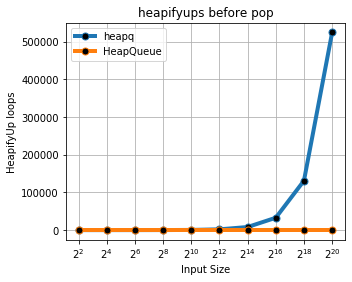

In [5]:
plt.subplots(figsize=(5,4))
plt.title('heapifyups before pop')
plt.xlabel('Input Size')
plt.ylabel('HeapifyUp loops')
plt.plot(power_text, data_formatted["Heapq"]["before"]["up"], label="heapq", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.plot(power_text, data_formatted["HeapQueue duplicates"]["before"]["up"], label="HeapQueue", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.grid()
plt.legend()
plt.show()

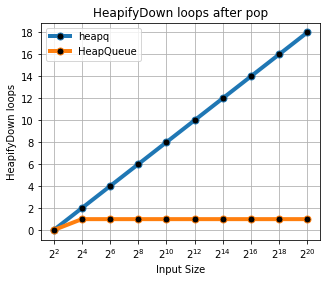

<Figure size 432x288 with 0 Axes>

In [6]:
plt.subplots(figsize=(5,4))
plt.title('HeapifyDown loops after pop')
plt.xlabel('Input Size')
plt.ylabel('HeapifyDown loops')
plt.plot(power_text, data_formatted["Heapq"]["after"]["down"], label="heapq", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.plot(power_text, data_formatted["HeapQueue duplicates"]["after"]["down"], label="HeapQueue", linewidth=4, marker='o', markersize=7, markerfacecolor='black')
plt.yticks(range(0, 19, 2))
plt.grid()
plt.legend()
plt.show()
plt.savefig('test.pgf')
